## Ames Housing - Linear Regression

Using Linear Regression and Machine Learning in the sklearn library, we'll be using our dataset to predict house sale prices.

To do so we'll be:

1. Splitting our data into training and test sets
2. Transforming our dataset, cleaning it and adding features
3. Determining the best features to use for modeling
4. Determine the best linear regression model

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [121]:
data = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [122]:
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [180]:
def transform_features(data):
    # Drop unnecessary columns and/or columns that leak
    # info about the sale
    data = data.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type"], axis=1)

    # Drop any columns missing more than 25% of values
    missing_25_percent_or_more = data.isnull().sum() / len(data) >= 0.25
    clean_data = data[missing_25_percent_or_more[missing_25_percent_or_more == False].index]
    
    # Fill in numerical values missing 5% or less with the average value
    numerical_columns = clean_data.select_dtypes(include=["float", "integer"]).columns
    missing_5_percent_or_less = clean_data[numerical_columns].isnull().sum() / len(clean_data) <= 0.05
    
    clean_data[missing_5_percent_or_less[missing_5_percent_or_less == True].index].fillna(clean_data.mean())
    
    # Create new features
    clean_data["years_until_remodel"] = clean_data["Year Remod/Add"] - clean_data["Year Built"]
    clean_data["years_before_sale"] = clean_data["Yr Sold"] - clean_data["Year Built"]
    
    # Drop year sold column that leaks information
    del clean_data["Yr Sold"]
    del clean_data["Year Built"]
    del clean_data["Year Remod/Add"]

    return clean_data

In [181]:
def select_features():
    columns = ["Gr Liv Area", "SalePrice"]
    return train[columns]


In [182]:
def train_and_test(data):
    row_limit = round(len(data) / 2)
    train = data[:row_limit]
    test = data[row_limit:]
    
    numerical_cols = data.select_dtypes(include="int").columns
    del numerical_cols["SalePrice"]
    
    features = numerical_cols
    target = "SalePrice"
    
    lr = LinearRegression()
    lr.predict(train[features], train[target])
    
    lr.fit

In [183]:
clean_data = transform_features(data)

clean_data.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_until_remodel,years_before_sale
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,210,62,0,0,0,0,0,215000,0,50
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,140,0,0,0,120,0,0,105000,0,49
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,393,36,0,0,0,0,12500,172000,0,52
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,244000,0,42
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,212,34,0,0,0,0,0,189900,1,13


In [184]:
for index, row in clean_data.iterrows():
    if row["years_until_remodel"] < 0:
        print(index)
        
for index, row in clean_data.iterrows():
    if row["years_before_sale"] < 0:
        print(index)
        
clean_data.shape

850
2180


(2930, 71)

In [185]:
# Drop bad data rows

clean_data = clean_data.drop([850, 2180], axis=0)

clean_data.shape

(2928, 71)

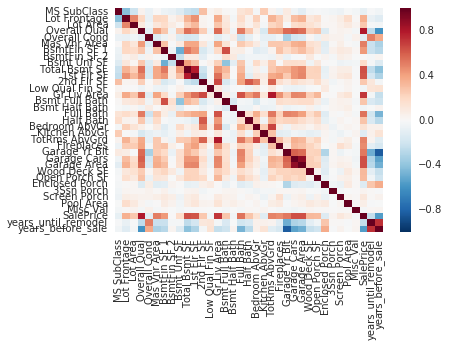

In [186]:
%matplotlib inline
import seaborn as sns

numerical_cols = clean_data.select_dtypes(include=["integer", "float"]).columns

corr = clean_data[numerical_cols].corr()


sns.heatmap(corr)

In [187]:
# Find the best overall features

corr_sale_df = pd.DataFrame(corr["SalePrice"])

significant_corr = abs(corr_sale_df) >= 0.5
significant_corr = corr_sale_df[significant_corr == True]

significant_corr = significant_corr.dropna()

significant_corr


,SalePrice
Overall Qual,0.800279
Mas Vnr Area,0.511688
Total Bsmt SF,0.641467
1st Flr SF,0.632531
Gr Liv Area,0.712893
Full Bath,0.545641
Garage Yr Blt,0.527115
Garage Cars,0.648137
Garage Area,0.641448
SalePrice,1.000000


In [188]:
clean_data[significant_corr.index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2929
Data columns (total 11 columns):
Overall Qual         2928 non-null int64
Mas Vnr Area         2905 non-null float64
Total Bsmt SF        2927 non-null float64
1st Flr SF           2928 non-null int64
Gr Liv Area          2928 non-null int64
Full Bath            2928 non-null int64
Garage Yr Blt        2769 non-null float64
Garage Cars          2927 non-null float64
Garage Area          2927 non-null float64
SalePrice            2928 non-null int64
years_before_sale    2928 non-null int64
dtypes: float64(5), int64(6)
memory usage: 274.5 KB


In [189]:
features = ["Overall Qual", "Year Built", "Year Remod/Add"]